In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu124'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


<h1>1. Data Preparing and Loading</h1>

Data in machine learning can be almost anything you can imagine.
* A table of numbers (like a big Excel spreadsheet),
* images of any kind,
* videos (YouTube has lots of data!),
* audio files like songs or podcasts,
* protein structures,
* text and more.

Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.

Creating data using linear regression formula (known parameters)

y = a + bx

* y -> independent variable
* x -> dependent variable tensor
* b -> slope/gradient/weights
* a -> intercept/bias

In [3]:
weight = 0.7
bias = 0.3

In [4]:
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

Split data into train and test

Generalization: The ability for a machine learning model to perform well on data it hasn't seen before



*   training set - model learns patterns from here
*   validation set - tune model patterns
*   test set - evaluate performance of the model



In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [7]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size":14})

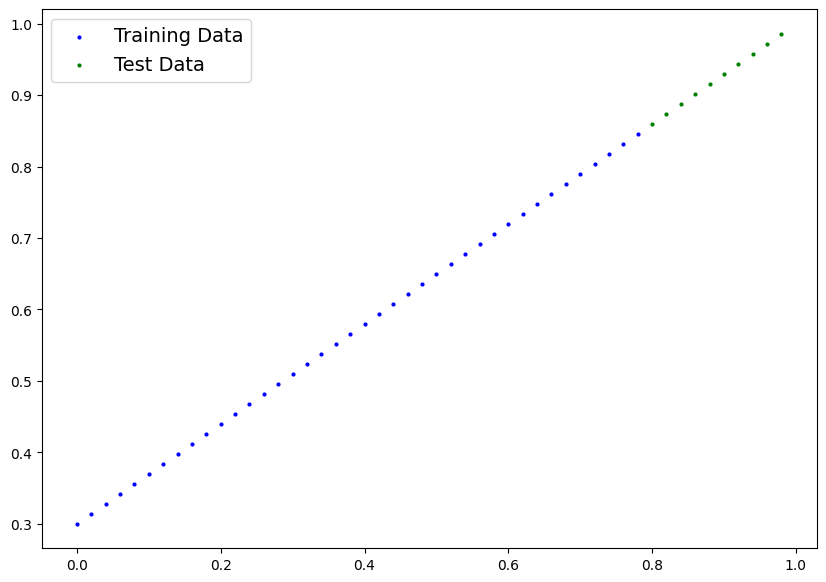

In [8]:
plot_predictions(X_train,y_train,X_test,y_test)

<h1>2. Model</h1>

In [9]:
# # Create a Linear Regression Model Class
# class LinearRegressionModel(nn.Module):
#   # nn.Module -> Base class for all neural network modules
#   def __init__(self):
#     super().__init__()
#     self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
#     self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

#   # forward method to define the computation in the model
#   def forward(self, x: torch.Tensor) -> torch.Tensor:
#     return self.weights * x + self.bias

In [10]:
# Subclass nn.Module to make our model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

What the model does:
*  Start with random weights and bias
*  look at training data and adjust the random values to get closer to ideal values

It does so through two main algorithms:
* Gradient Descent
* Backpropogation

<h2>PyTorch Model Building Essentials</h2>



*   torch.nn - Contains all of the building blocks for computational graphs (a neural network can be considered as a computational graph).
*   torch.nn.Parameter - which parameters the model should try to learn - Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
*   torch.nn.Module - The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
*   torch.optim - Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
*   def forward() - All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).



<h2>Checking contents of the model</h2>

In [11]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [12]:
model_0.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [13]:
# checking the parameters
#model_0.parameters() # it returns a generator
list(model_0.parameters())

# we see random values for weight and bias

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [14]:
# List named parameters
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

<h1>3. Prediction</h3>

Checking the current prediction power of the model

In [15]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [16]:
# put data on target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [17]:
with torch.inference_mode(): # faster mode as gradients are not saved to memory
  y_preds = model_0(X_test)

y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]], device='cuda:0')

torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

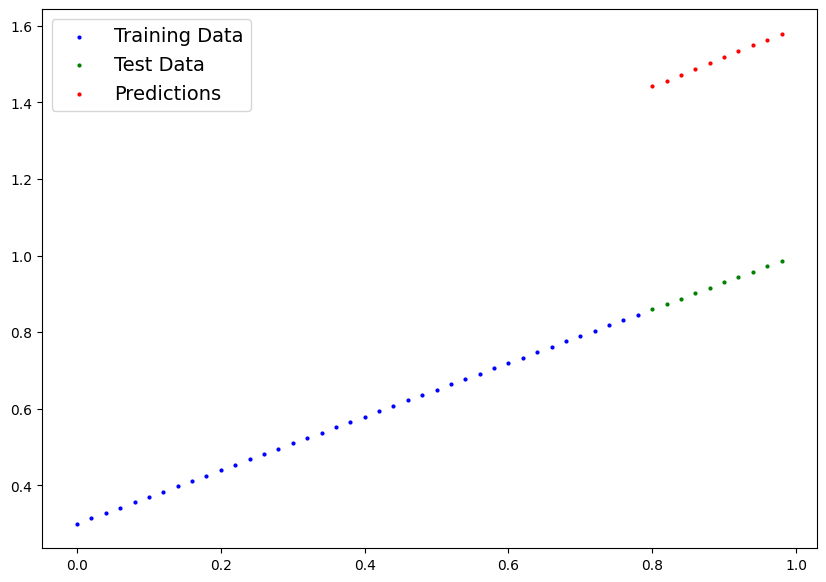

In [18]:
plot_predictions(X_train.cpu(),y_train.cpu(),X_test.cpu(),y_test.cpu(),y_preds.cpu())

<h1>4. Training and Testing</h1>

Things we need to train:
*  Loss Function: Measures how wrong your model's predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.
*  Optimizer: Takes into account the loss of a model and adjusts the model's parameters to improve the loss function. Tells your model how to update its internal parameters to best lower the loss.

<h2>Setting up loss function and Optimizer</h2>

In [19]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)
# lr - hyperparameter

<h2>Build the Training Loop</h2>

What we need in a training loop:-
* Loop through the data
* Forward pass for prediction
* Calculate the loss
* Optimizer zero grad
* Backpropogation
* Optimizer step (update parameters)

In [20]:
torch.manual_seed(42)

epochs = 200 # hyperparameter

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train method in PyTorch sets all parameters that require gradients to require_grad=True
  # Forward pass
  y_pred = model_0(X_train) # performs forward() method located in the model object
  # Calculate loss
  loss = loss_fn(y_pred, y_train)
  # Optimizer zero grad
  optimizer.zero_grad() # sets optimizer's accumulated step gradients to zero
  # perform backpropogation on the loss wrt parameters of the model
  loss.backward()
  # step the optimizer (perform gradient descent)
  optimizer.step() # update the model's parameters wrt gradients calculated by loss.backward()

  # Testing
  model_0.eval() # turns off gradient tracking
  with torch.inference_mode():
    # Do the forward pass
    test_pred = model_0(X_test)
    # calculate the test loss
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
OrderedDict([('linear_layer.weight', tensor([[0.7606]], device='cuda:0')), ('linear_layer.bias', tensor([0.8200], device='cuda:0'))])
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
OrderedDict([('linear_layer.weight', tensor([[0.7216]], device='cuda:0')), ('linear_layer.bias', tensor([0.7200], device='cuda:0'))])
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
OrderedDict([('linear_layer.weight', tensor([[0.6826]], device='cuda:0')), ('linear_layer.bias', tensor([0.6200], device='cuda:0'))])
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
OrderedDict([('linear_layer.weight', tensor([[0.6436]], device='cuda:0')), ('linear_layer.bias', tensor([0.5200], device='cuda:0'))])
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
OrderedDict([('linear_layer.weight', tensor([[0.6046]], device='cuda:0')), ('linear_layer.bias', tensor([0.4200], de

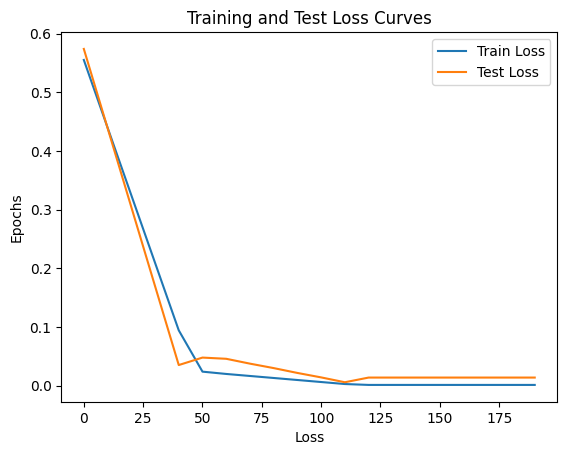

In [23]:
import numpy as np

plt.plot(epoch_count, (np.array(torch.tensor(loss_values).cpu().numpy())), label="Train Loss")
plt.plot(epoch_count, (np.array(torch.tensor(test_loss_values).cpu().numpy())), label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend()

In [24]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

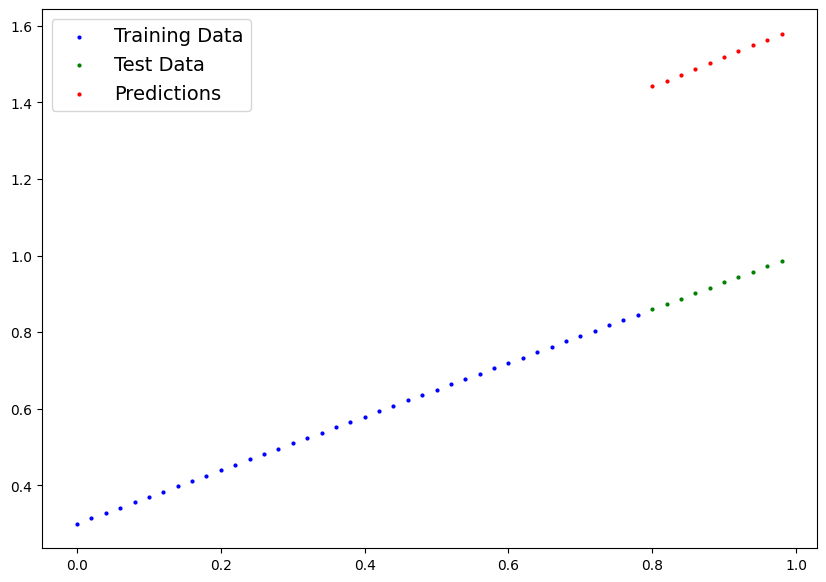

In [25]:
# matplotlib is based on numpy
# numpy computaions cannot be done on GPU

plot_predictions(X_train.cpu(),y_train.cpu(),X_test.cpu(),y_test.cpu(),y_preds.cpu())

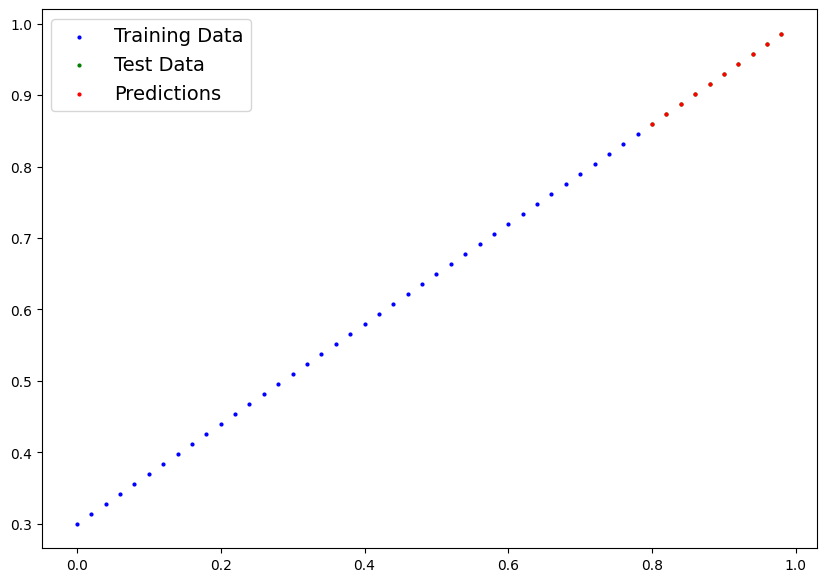

In [26]:
plot_predictions(X_train.cpu(),y_train.cpu(),X_test.cpu(),y_test.cpu(),y_preds_new.cpu())

<h1>5. Saving and Loading the model</h1>



*   torch.save - Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
*   torch.load - 	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
*   torch.nn.Module.load_state_dict - Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.



<h2>Saving a model</h2>

In [27]:
from pathlib import Path

# create models directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: Models/01_pytorch_workflow_model_0.pth


<h2>Load a model</h2>

Because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model

In [31]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.to(device)

<ipython-input-31-0ed543bc087c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [32]:
loaded_model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [33]:
# Put the loaded model into evaluation mode
loaded_model_0.eval()

# Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

loaded_model_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [34]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

<hr>